<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras - simple model</h2>


In [1]:
!pip install -U tensorflow tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:08
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.2 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 KB 1.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 5.7 MB/s eta 0:00:005.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 KB 5.3 MB/s eta 0:00:00
  Attempting uninstall: flatbuf

In [3]:
import os
import sys
import re
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary

from google.protobuf import struct_pb2

%load_ext tensorboard
%matplotlib inline

2024-02-17 13:39:32.662995: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 13:39:32.742875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 13:39:32.742908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 13:39:32.744449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 13:39:32.757131: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 13:39:32.757440: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
print(tf.__version__)
try:
    physical_devices = tf.config.list_physical_devices('GPU') 
    #tf.config.experimental.set_memory_growth(physical_devices[0], True)
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print(physical_devices)
except:
    print("No GPU")

2.15.0
[]


2024-02-17 13:39:35.163158: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

First we'll develop a small ANN with Keras:

In [6]:
# load pima indians dataset
dataset = np.loadtxt("../../../data/pima-indians-diabetes.csv", delimiter=",")

In [7]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [9]:
X.shape

(768, 8)

In [10]:
Y.shape

(768,)

In [8]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics

# Create model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

2022-09-09 22:27:43.642179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=400, batch_size=64, verbose=1)

Epoch 1/400
10/10 [==============================] - 1s 23ms/step - loss: 0.6925 - accuracy: 0.6433 - val_loss: 0.6919 - val_accuracy: 0.6429
Epoch 2/400
10/10 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.6547 - val_loss: 0.6907 - val_accuracy: 0.6429
Epoch 3/400
10/10 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.6531 - val_loss: 0.6894 - val_accuracy: 0.6429
Epoch 4/400
10/10 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.6531 - val_loss: 0.6881 - val_accuracy: 0.6429
Epoch 5/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.6531 - val_loss: 0.6871 - val_accuracy: 0.6429
Epoch 6/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.6531 - val_loss: 0.6859 - val_accuracy: 0.6429
Epoch 7/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.6531 - val_loss: 0.6847 - val_accuracy: 0.6429
Epoch 8/400


In [12]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


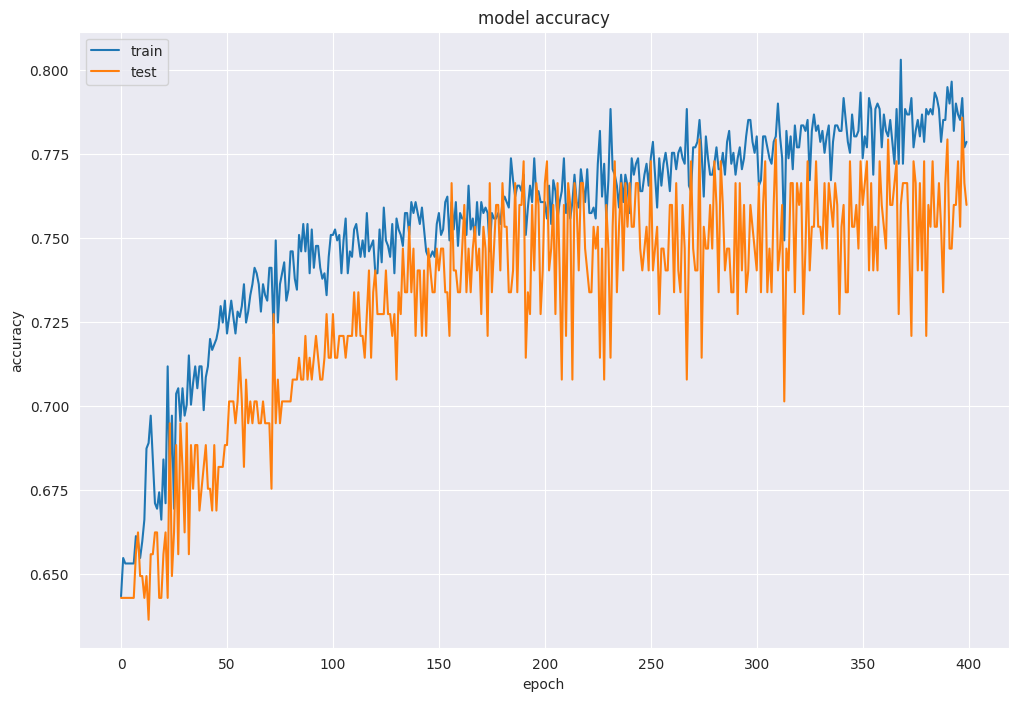

In [13]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

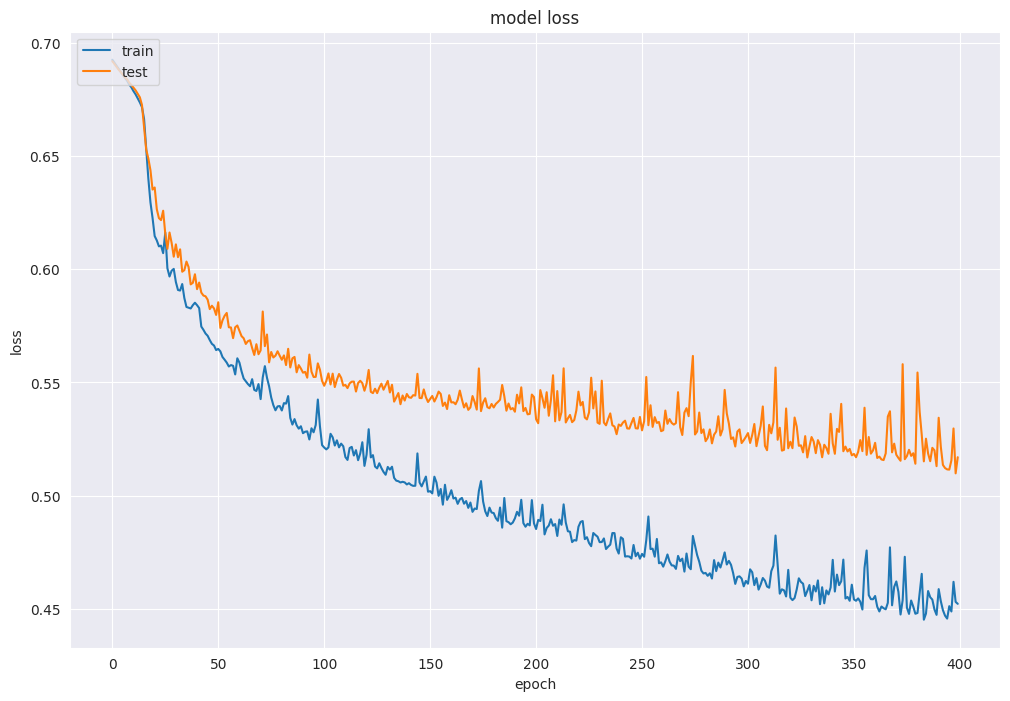

In [14]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7786

accuracy: 77.86458134651184


In [16]:
# calculate predictions
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

for pred in list(zip(predictions[0:10], rounded[0:10])):
    print(pred)

24/24 [==============================] - 0s 1ms/step
(array([0.6440998], dtype=float32), 1)
(array([0.07097598], dtype=float32), 0)
(array([0.85858035], dtype=float32), 1)
(array([0.06690314], dtype=float32), 0)
(array([0.9136921], dtype=float32), 1)
(array([0.22946472], dtype=float32), 0)
(array([0.12990266], dtype=float32), 0)
(array([0.5056273], dtype=float32), 1)
(array([0.7538509], dtype=float32), 1)
(array([0.01784125], dtype=float32), 0)
